# Kaggle  Competitions for House Price: Advanced Regression Techniques

In [1]:
# import dependencis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

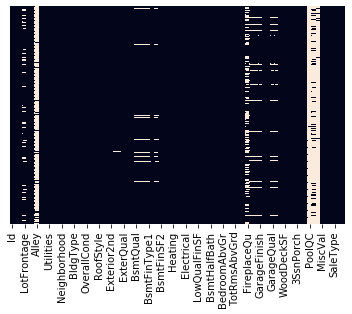

In [7]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [9]:
# # # filling missing Values columns by columns #---------------------------------- for showoff

# df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].mean())
# test_df["MSZoning"] = test_df["MSZoning"].fillna(test_df["MSZoning"].mode()[0])

In [10]:
def deal_with_missing_values(df):
    
    # function for dealing with missing values by columns || whose null values were < 50 % of the total size of the data
    # 1. for object dtypes --> replaced by mode
    # 2. for int64 or float64 dtypes --> replaced by mean

    for i in df.columns:
        if df[i].dtypes == "object" and df[i].isnull().sum() < df.shape[0]/2:
            df[i] = df[i].fillna(df[i].mode()[0])

        elif df[i].dtypes == "Int64" or df[i].dtypes == "float64" and df[i].isnull().sum() < df.shape[0]/2:
            df[i] = df[i].fillna(df[i].mean())

        elif df[i].isnull().sum() > df.shape[0]/2:
#             df.drop([i], axis = 1, inplace = True)
            print("these will be deleted")

    print("Execution successfill")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [12]:
deal_with_missing_values(df)
print(df.shape)
df.isnull().any().sum()

these will be deleted
these will be deleted
these will be deleted
these will be deleted
Execution successfill
(1460, 81)


C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  # This is added back by InteractiveShellApp.init_path()


4

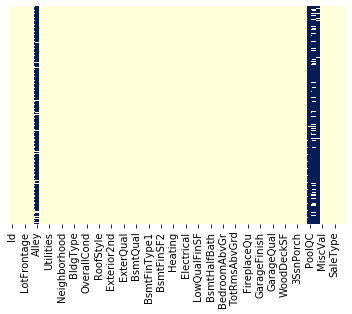

In [13]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False,cmap="YlGnBu")

In [14]:
df.drop(["Id"],inplace=True,axis=1)

In [15]:
# df.dropna(inplace=True)

In [16]:
df.shape

(1460, 80)

In [17]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [18]:
test_df = pd.read_csv("tt.csv")

In [19]:
test_df.shape

(1459, 79)

In [20]:
test_df.isnull().any().sum()

5

In [21]:
final_df = pd.concat([df,test_df], axis=0)

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [22]:
final_df.shape

(2919, 80)

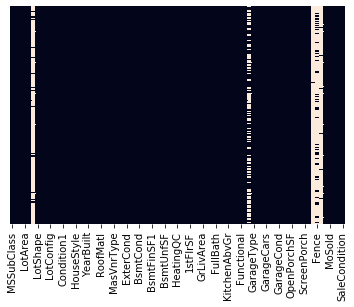

In [23]:
sns.heatmap(test_df.isnull(), yticklabels=False, cbar=False)

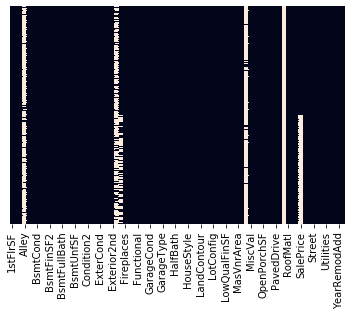

In [24]:
sns.heatmap(final_df.isnull(), yticklabels=False, cbar=False)

In [25]:
len(df.columns)# == 
len(test_df.columns)

79

In [26]:
final_df["FireplaceQu"] = final_df["FireplaceQu"].fillna(final_df["FireplaceQu"].mode()[0]) 

In [27]:
final_df["FireplaceQu"].isnull().sum()

0

In [28]:
# iloc is for numeric columns 

final_df.loc[:,final_df.isnull().any()].head()

,Alley,Fence,MiscFeature,PoolQC,SalePrice
0,NaN,NaN,NaN,NaN,208500.0
1,NaN,NaN,NaN,NaN,181500.0
2,NaN,NaN,NaN,NaN,223500.0
3,NaN,NaN,NaN,NaN,140000.0
4,NaN,NaN,NaN,NaN,250000.0


In [29]:
final_df.drop(["Alley","Fence","MiscFeature","PoolQC"],axis= 1, inplace = True)

In [30]:
final_df["SalePrice"]

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
5       143000.0
6       307000.0
7       200000.0
8       129900.0
9       118000.0
10      129500.0
11      345000.0
12      144000.0
13      279500.0
14      157000.0
15      132000.0
16      149000.0
17       90000.0
18      159000.0
19      139000.0
20      325300.0
21      139400.0
22      230000.0
23      129900.0
24      154000.0
25      256300.0
26      134800.0
27      306000.0
28      207500.0
29       68500.0
          ...   
1429         NaN
1430         NaN
1431         NaN
1432         NaN
1433         NaN
1434         NaN
1435         NaN
1436         NaN
1437         NaN
1438         NaN
1439         NaN
1440         NaN
1441         NaN
1442         NaN
1443         NaN
1444         NaN
1445         NaN
1446         NaN
1447         NaN
1448         NaN
1449         NaN
1450         NaN
1451         NaN
1452         NaN
1453         NaN
1454         NaN
1455         NaN
1456         N

In [31]:
print(final_df["SalePrice"].tail())
print("\n")
print(final_df["SalePrice"].head())


1454   NaN
1455   NaN
1456   NaN
1457   NaN
1458   NaN
Name: SalePrice, dtype: float64


0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64


In [32]:
final_df.shape

(2919, 76)

In [33]:
columns = []
for i in final_df.columns:
    if final_df[i].dtypes == "object":
        columns.append(i)
        
print(len(columns))

39


In [34]:
main_df = final_df

In [35]:
# def category_onehot_multcols(multcolumns):
#     df_final=final_df
#     i=0
#     for fields in multcolumns:
        
#         print(fields)
#         df1=pd.get_dummies(final_df[fields],drop_first=True)
        
#         final_df.drop([fields],axis=1,inplace=True)
#         if i==0:
#             df_final=df1.copy()
#         else:
            
#             df_final=pd.concat([df_final,df1],axis=1)
#         i=i+1
       
        
#     df_final=pd.concat([final_df,df_final],axis=1)
        
#     return df_final

In [36]:
def category_onehot_multcols(multcolumns):
    cc = final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1 = pd.get_dummies(final_df[fields], drop_first=True)
        
        final_df.drop([fields], axis =1, inplace=True)
        if i ==0:
            cc = df1.copy()
        else:
            cc = pd.concat([cc, df1], axis = 1)
        i=i+1
        
    cc = pd.concat([final_df, cc], axis = 1)
    
    return cc

In [37]:
final_df=category_onehot_multcols(columns)

BldgType
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
BsmtQual
CentralAir
Condition1
Condition2
Electrical
ExterCond
ExterQual
Exterior1st
Exterior2nd
FireplaceQu
Foundation
Functional
GarageCond
GarageFinish
GarageQual
GarageType
Heating
HeatingQC
HouseStyle
KitchenQual
LandContour
LandSlope
LotConfig
LotShape
MSZoning
MasVnrType
Neighborhood
PavedDrive
RoofMatl
RoofStyle
SaleCondition
SaleType
Street
Utilities


In [38]:
final_df.shape

(2919, 237)

In [39]:
# deleting duplicate columns 

final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [40]:
final_df.shape

(2919, 177)

In [41]:
final_df.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch',
       ...
       'CWD', 'Con', 'ConLD', 'ConLI', 'ConLw', 'New', 'Oth', 'WD', 'Pave',
       'NoSeWa'],
      dtype='object', length=177)

In [42]:
final_df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,Pave,NoSeWa
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,0,0,0,1,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,0,0,0,1,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,0,0,0,1,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,0,0,0,1,1,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,0,0,0,1,1,0


only sales price will be null in test data


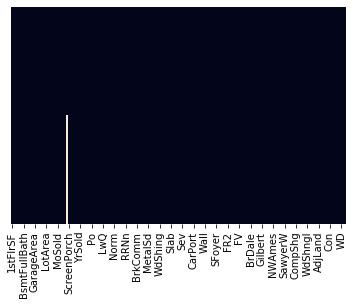

In [43]:
sns.heatmap(final_df.isnull(), yticklabels=False, cbar=False)
print("only sales price will be null in test data")

In [44]:
# # 2919

# final_df.shape - 

In [45]:

df_Train=final_df.iloc[:1460,:]
df_Test=final_df.iloc[1460:,:]

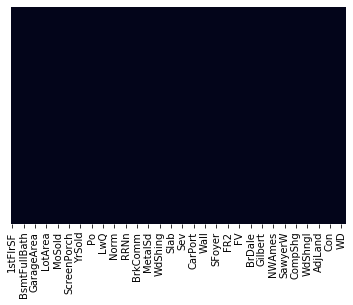

In [46]:
sns.heatmap(df_Train.isnull(), yticklabels=False, cbar=False)

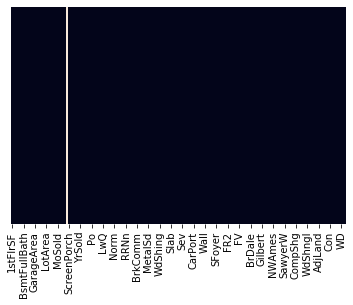

In [47]:
sns.heatmap(df_Test.isnull(), yticklabels=False, cbar=False)

In [48]:
final_df.shape[0] - df_Train.shape[0] 

1459

In [49]:
df_Train.shape[0] 

1460

In [50]:
df_Train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,Pave,NoSeWa
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,0,0,0,1,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,0,0,0,1,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,0,0,0,1,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,0,0,0,1,1,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,0,0,0,1,1,0


In [51]:
df_Test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,Pave,NoSeWa
0,896,0,0,2,468.0,144.0,0.0,0.0,270.0,0,...,0,0,0,0,0,0,0,1,1,0
1,1329,0,0,3,923.0,0.0,0.0,0.0,406.0,0,...,0,0,0,0,0,0,0,1,1,0
2,928,701,0,3,791.0,0.0,0.0,0.0,137.0,0,...,0,0,0,0,0,0,0,1,1,0
3,926,678,0,3,602.0,0.0,0.0,0.0,324.0,0,...,0,0,0,0,0,0,0,1,1,0
4,1280,0,0,2,263.0,0.0,0.0,0.0,1017.0,0,...,0,0,0,0,0,0,0,1,1,0


In [52]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\Acer\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [53]:
# df_Train["SalePrice"]

In [54]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

# Prediciton and selecting the Algorithm

In [55]:
# pip3 install xgboost
!pip3 install xgboost
# import xgboost as xgb

  Using cached https://files.pythonhosted.org/packages/96/84/4e2cae6247f397f83d8adc5c2a2a0c5d7d790a14a4c7400ff6574586f589/xgboost-0.90.tar.gz


Files/directories not found in C:\Users\Acer\AppData\Local\Temp\pip-install-su31fh8l\xgboost\pip-egg-info
You are using pip version 19.0.3, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [56]:
import xgboost as xgb

In [57]:
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)

C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[21:52:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [58]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(regressor, open(filename, 'wb'))

In [59]:
y_pred=regressor.predict(df_Test)

In [60]:
y_pred

array([122070.22, 152960.83, 177906.08, ..., 165342.16, 121931.48,
       241622.31], dtype=float32)

In [61]:
len(y_pred)

1459

In [63]:
##Create Sample Submission file and Submit
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)